In [126]:
# Basic data science pakages
import numpy as np ### For numerical computation
import pandas as pd ### For working with data

# For Creating visualizations 
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns

# To handle imbalanced data
from imblearn.over_sampling import SMOTE

# For creating training and test set
from sklearn.model_selection import train_test_split

# For column transformation
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector

# To make pipeline (or automate all the model creation works)
from sklearn.pipeline import make_pipeline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# For Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For evaluating model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

# Remove all kinds of warning
from warnings import filterwarnings 
filterwarnings('ignore')

In [127]:
# Type of graph that we want
plt.style.use('seaborn-whitegrid')

In [128]:
# Maximum number of columns and rows that it will show
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [129]:
# Loading the dataset
df = pd.read_csv('income_classification.csv')

In [130]:
# Showing the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [131]:
# Shape of the data
df.shape

(32561, 15)

In [132]:
# Stripping the unnecessary spaces in the names of columns
df.columns = df.columns.str.strip()

In [80]:
# Total Description of the data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [133]:
# Total information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [134]:
# Stripping out unnecessary spaces in the values of categorical columns
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].str.strip()

In [135]:
# Looking into each columns individually
for i in df.columns:
    print('*' * 100)
    print('{}:- {}\n{}\n'.format(i, df[i].nunique(), df[i].unique()))
    print(pd.DataFrame({'count': df[i].value_counts(), '%': df[i].value_counts(normalize = True)}))
    print('/' * 100, '\n\n')

****************************************************************************************************
age:- 73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

    count         %
36    898  0.027579
31    888  0.027272
34    886  0.027210
23    877  0.026934
35    876  0.026903
..    ...       ...
83      6  0.000184
85      3  0.000092
88      3  0.000092
86      1  0.000031
87      1  0.000031

[73 rows x 2 columns]
//////////////////////////////////////////////////////////////////////////////////////////////////// 


****************************************************************************************************
workclass:- 9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

                  count         %
Private           22696  0.697

In [136]:
# Depict same information for education (so, removing it)
df.drop('education-num', axis = 1, inplace = True)

age


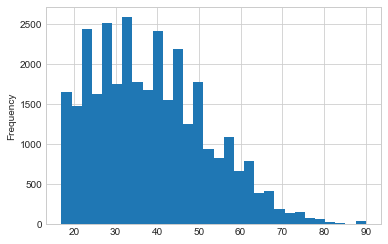

workclass


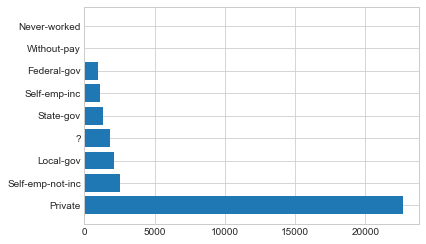

fnlwgt


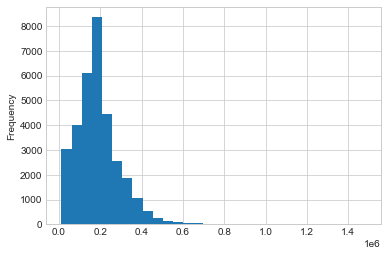

education


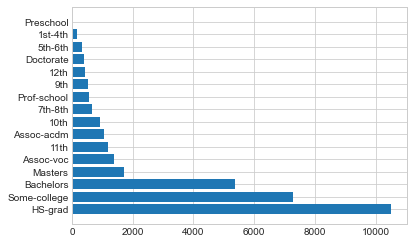

marital-status


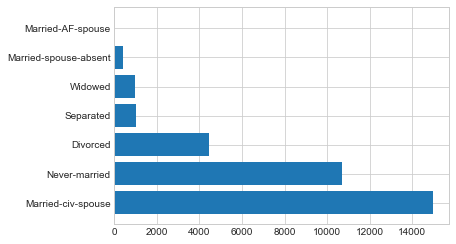

occupation


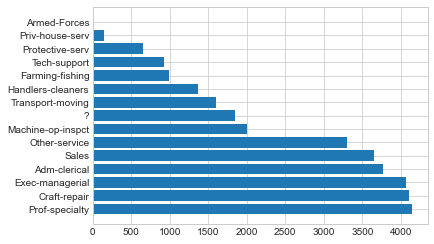

relationship


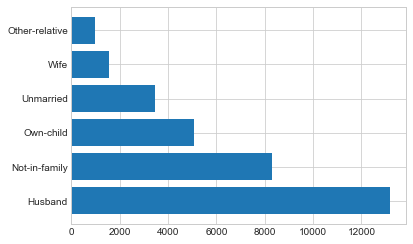

race


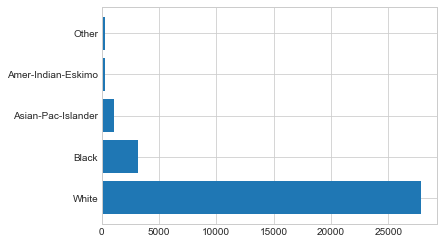

sex


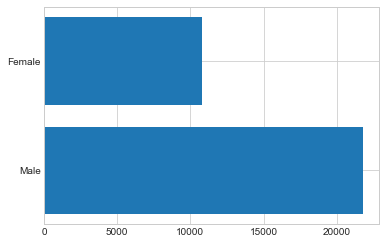

capital-gain


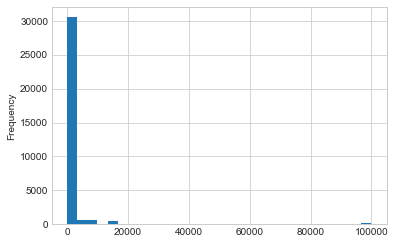

capital-loss


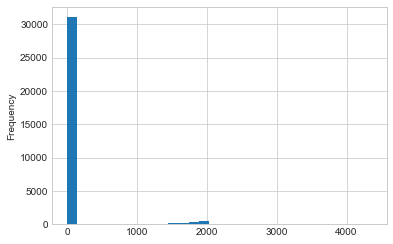

hours-per-week


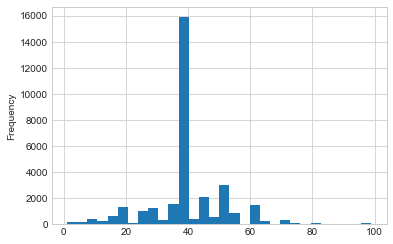

native-country


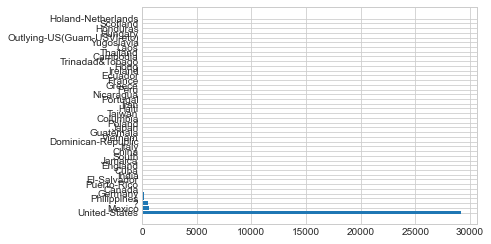

income


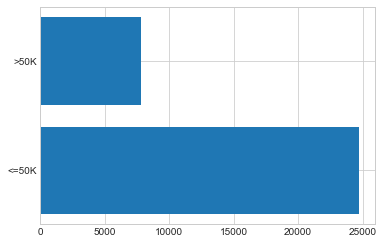

In [137]:
# Distribution of values in columns
for i in df.columns:
    print(i)
    try: 
        df[i].plot.hist(bins = 30)
        plt.show()
    except:
        plt.barh(df[i].value_counts().index, df[i].value_counts().values)
        plt.show()

In [138]:
# Finding which columns have the missing values
missing_val = []
for i in df.columns:
    if ('?' in df[i].unique()):
        print(i)
        missing_val.append(i)

workclass
occupation
native-country


In [139]:
# Looking into each columns which have missing values
for i in missing_val:
    print(i, ':-')
    print('_'*20)
    print(df[i].value_counts())
    print('*'*20, '\n\n')

workclass :-
____________________
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
******************** 


occupation :-
____________________
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
                   ... 
Farming-fishing     994
Tech-support        928
Protective-serv     649
Priv-house-serv     149
Armed-Forces          9
Name: occupation, Length: 15, dtype: int64
******************** 


native-country :-
____________________
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
                              ...  
Outlying-US(Guam-USVI-etc)       14
Hungary              

In [140]:
# Filling missing values of native-country
df['native-country'].replace('?', df['native-country'].value_counts().index[0], inplace = True)

In [141]:
# Column (native-country) after filling the missing values
df['native-country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
                              ...  
Outlying-US(Guam-USVI-etc)       14
Hungary                          13
Honduras                         13
Scotland                         12
Holand-Netherlands                1
Name: native-country, Length: 41, dtype: int64

In [142]:
# Filling misssing values of occupation
replace_occ = df.loc[df['occupation'] != '?', 'occupation'].sample(len(df.loc[df['occupation'] == '?', 'occupation']))

replace_occ.index = df.loc[df['occupation'] == '?'].index

df.loc[df['occupation'] == '?', 'occupation'] = replace_occ

In [143]:
# Column (occupation) after filling the missing values
df['occupation'].value_counts()

Prof-specialty     4386
Craft-repair       4324
Exec-managerial    4313
Adm-clerical       4008
Sales              3861
                   ... 
Farming-fishing    1051
Tech-support        972
Protective-serv     676
Priv-house-serv     158
Armed-Forces          9
Name: occupation, Length: 14, dtype: int64

In [144]:
# Filling missing values of workclass
replace_wkc = df.loc[df['workclass'] != '?', 'workclass'].sample(len(df.loc[df['workclass'] == '?', 'workclass']))

replace_wkc.index = df.loc[df['workclass'] == '?'].index

df.loc[df['workclass'] == '?', 'workclass'] = replace_wkc

In [145]:
# Column (workclass) after filling the missing values
df['workclass'].value_counts()

Private             24048
Self-emp-not-inc     2694
Local-gov            2212
State-gov            1398
Self-emp-inc         1181
Federal-gov          1007
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [146]:
# It is a class which will help in checking outliers in different columns of the data
# Here, It uses three techniques to find the outliers (we can use anyone of them)
# The techniques are:-
# * IQR
# * Z score
# * Standard Deviation

class Outliers(object):
    def __init__(self, df, col):
        self.df = df
        self.col = col
        self.min = df[col].min()
        self.max = df[col].max()
        self.mean = df[col].mean()
        self.std = df[col].std()
        self.median = df[col].median()
        self.quantile_25 = df[col].quantile(0.25)
        self.quantile_75 = df[col].quantile(0.75)
    @property    
    def info(self):
        print('{}:- '.format(self.col))
        print('Minimum:- {}'.format(self.min))
        print('Maximum:- {}'.format(self.max))
        print('Mean:- {}'.format(self.mean))
        print('Median:- {}'.format(self.median))
        print('Standard Deviation:- {}'.format(self.std))
        print('First Quantile:- {}'.format(self.quantile_25))
        print('Third Quantile:- {}'.format(self.quantile_75))

        
class IQR(Outliers):
    def __init__(self, df, col):
        super().__init__(df, col) 
        
        self.IQR = self.quantile_75 - self.quantile_25
        self.lower_bound = self.quantile_25 - (1.5 * self.IQR)
        self.upper_bound = self.quantile_75 + (1.5 * self.IQR)
        
    
    def iqr_outliers(self):
        return self.df.loc[(self.df[self.col] < self.lower_bound) | (self.df[self.col] > self.upper_bound), self.col].values
    
    def removed_outliers(self):
        return self.df.loc[(self.df[self.col] > self.lower_bound) & (self.df[self.col] < self.upper_bound)]
    
class Z_score(Outliers):
    def __init__(self, df, col):
        super().__init__(df, col)
        pass
    
    def z_score_outliers(self):
        outlier = []
        for i in self.df[self.col]:
            z = (i - self.mean) / self.std
            if abs(z) > 3:
                outlier.append(i)
                return outlier
    
    def removed_outliers(self):
        df_copy = self.df
        for i in self.z_score_outliers():
            df_copy = df_copy.loc[df_copy[self.col] != i]
            return df_copy
    
class StandardDeviation(Outliers):
    def __init__(self, df, col):
        super().__init__(df, col)
        pass
    
    @property
    def std_calc(self):
        lower_std = self.mean - (3 * self.std)
        upper_std = self.mean + (3 * self.std)
        
        return lower_std, upper_std
    
    def std_outliers(self):
        lower_std, upper_std = self.std_calc
        return self.df.loc[(self.df[self.col] < lower_std) | (self.df[self.col] > upper_std), self.col].values
    
    def removed_outliers(self):
        lower_std, upper_std = self.std_calc
        return self.df.loc[(self.df[self.col] > lower_std) & (self.df[self.col] < upper_std)]

In [147]:
# It will show the outliers of the columns

for i in df.columns:
    if df[i].dtype != object:
        out = Outliers(df, i)
        iqr = IQR(df, i)
        z_score = Z_score(df, i)
        std = StandardDeviation(df, i)
        
        print('Column:- {}\n'.format(i))
        print('INFO:- \n')
        out.info
        
        print('\nOutlier with IQR:- {}\n'.format(i))
        print(iqr.iqr_outliers())
        print('----------> dataset shape after removing outliers with iqr:-{}\n'.format(iqr.removed_outliers().shape))
              
        print('\nOutlier with Z_score:- {}\n'.format(i))
        print(z_score.z_score_outliers())
        print('----------> dataset shape after removing outliers with z_score:- {}\n'.format(z_score.removed_outliers().shape))
        
        print('\nOutlier with Standard deviation:- {}\n'.format(i))
        print(std.std_outliers())
        print('----------> dataset shape after removing outliers with Standard Deviation:{}\n'.format(std.removed_outliers().shape))
        print('*'*100)      

Column:- age

INFO:- 

age:- 
Minimum:- 17
Maximum:- 90
Mean:- 38.58164675532078
Median:- 37.0
Standard Deviation:- 13.640432553581146
First Quantile:- 28.0
Third Quantile:- 48.0

Outlier with IQR:- age

[79 90 80 81 90 88 90 90 80 90 81 82 79 81 80 83 90 90 79 81 90 90 80 90
 90 79 79 84 90 80 90 81 83 84 81 79 85 82 79 80 90 90 90 84 80 90 90 79
 84 90 79 90 90 90 82 81 90 84 79 81 82 81 80 90 80 84 82 79 90 84 90 83
 79 81 80 79 80 79 80 90 90 80 90 90 81 83 82 90 90 81 80 80 90 79 80 82
 85 80 79 90 81 79 80 79 81 82 88 90 82 88 84 83 79 86 90 90 82 83 81 79
 90 80 81 79 84 84 79 90 80 81 81 81 90 87 90 80 80 82 90 90 85 82 81]
----------> dataset shape after removing outliers with iqr:-(32395, 14)


Outlier with Z_score:- age

[90]
----------> dataset shape after removing outliers with z_score:- (32518, 14)


Outlier with Standard deviation:- age

[90 80 81 90 88 90 90 80 90 81 82 81 80 83 90 90 81 90 90 80 90 90 84 90
 80 90 81 83 84 81 85 82 80 90 90 90 84 80 90 90 84 90 90 90 9

In [148]:
# Here, after looking at the outliers we came to the point where we will remove outliers of
# ---> age (z_score or Standard deviation)
# ---> fnlwgt (z_score or standard deviation)
# ---> hours per week (z_score or standard deviation)
# ---> capital gain (average of different groups)
# ---> capital loss (average of different groups)

In [149]:
# Removing outliers of age, fnlwgt, hours-per-week
df = Z_score(df, 'age').removed_outliers()
df = StandardDeviation(df, 'fnlwgt').removed_outliers()
df = Z_score(df, 'hours-per-week').removed_outliers()

In [150]:
df = df.reset_index().rename({'index': 'new_index'}, axis = 1).drop('new_index', axis = 1)

In [151]:
# Working on outliers of capital-gain 1
# making the group in which we will substitute the mean values of that group
cap_gn = {}
for i in np.arange(1, 110000, 10000):
    
        cap_gn[str(i) + ' - ' + str(i + 10000)] = df.loc[(df['capital-gain'] >= i) & (df['capital-gain'] < i + 10000), 'capital-gain'].mean()
        
for i,j in cap_gn.items():
    if j is np.nan:
        cap_gn[i] = 0
        
cap_gn

{'1 - 10001': 4864.68258132214,
 '10001 - 20001': 14318.209486166008,
 '20001 - 30001': 24037.55421686747,
 '30001 - 40001': 34095.0,
 '40001 - 50001': 41310.0,
 '50001 - 60001': 0,
 '60001 - 70001': 0,
 '70001 - 80001': 0,
 '80001 - 90001': 0,
 '90001 - 100001': 99999.0,
 '100001 - 110001': 0}

In [154]:
# Working on outliers of capital-gain 2
# Substituing mean values in capital-gain
for i in range(len(df['capital-gain'])):
    for j,k in cap_gn.items(): 
        t = int(j.split(' ')[0])
        r = int(j.split(' ')[-1])
        if (df.loc[i, 'capital-gain'] >= t) & (df.loc[i, 'capital-gain'] < r):
            df.loc[i, 'capital-gain'] = k
    

In [155]:
# capital-gain after handling outliers
# Here, it still don't look good, but i'm gonna keep it (because we can't always remove outliers)
# You can change/remove if you want


df['capital-gain'].value_counts()

0.000000        29386
4864.682581      1906
14318.209486      506
99999.000000      154
24037.554217       83
34095.000000        5
41310.000000        2
Name: capital-gain, dtype: int64

In [104]:
# Doing same as like the capital-loss
cap_ls = {}
for i in np.arange(1, 6000, 1000):
    
        cap_ls[str(i) + ' - ' + str(i + 1000)] = df.loc[(df['capital-loss'] >= i) & (df['capital-loss'] < i + 1000), 'capital-loss'].mean()
        
for i,j in cap_ls.items():
    if j is np.nan:
        cap_ls[i] = 0
        
cap_ls

{'1 - 1001': 603.4571428571429,
 '1001 - 2001': 1782.0876424189307,
 '2001 - 3001': 2279.732258064516,
 '3001 - 4001': 3589.25,
 '4001 - 5001': 4356.0,
 '5001 - 6001': 0}

In [105]:
# same as capital-gain
for i in range(len(df['capital-loss'])):
    for j,k in cap_ls.items(): 
        t = int(j.split(' ')[0])
        r = int(j.split(' ')[-1])
        if (df.loc[i, 'capital-loss'] >= t) & (df.loc[i, 'capital-loss'] < r):
            df.loc[i, 'capital-loss'] = k
    

In [156]:
# # Here also, it don't look good, but i'm gonna keep it (because we can't always remove outliers)
# You can change/remove outliers if you want

df['capital-loss'].value_counts()

0       30540
1902      199
1977      166
1887      158
1485       51
        ...  
2467        1
2472        1
1944        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [157]:
# Here, we can see that we have imbalanced data
pd.DataFrame({'count': df.income.value_counts(), '%': df.income.value_counts(normalize = True)})

,count,%
<=50K,24346,0.759815
>50K,7696,0.240185


In [158]:
# It will help in balancing imbalanced data
smote = SMOTE()

In [159]:
# The imbalanced data
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,4864.682581,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


In [160]:
# Transforming columns into numerical from categorical values
# as it supports numerical and not categorical values
# And also scaling the existing numerical values 

Ordenc = OrdinalEncoder()
labenc = LabelEncoder()
scale = StandardScaler()

num_enc = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_enc = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cat_enc_tar = ['income']

df[cat_enc] = Ordenc.fit_transform(df[cat_enc])
df[cat_enc_tar] = labenc.fit_transform(df[cat_enc_tar])
df[num_enc] = scale.fit_transform(df[num_enc])

In [161]:
# Balancing the data
X_train, y_train = smote.fit_resample(df.loc[:, :'income'], df['income'])

In [162]:
# Data before balanced
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.033728,6.0,-1.137962,9.0,4.0,0.0,1.0,4.0,1.0,0.520020,-0.217297,-0.023614,38.0,0
1,0.846181,5.0,-1.076683,9.0,2.0,3.0,0.0,4.0,1.0,-0.145976,-0.217297,-2.252697,38.0,0
2,-0.040131,3.0,0.322679,11.0,0.0,5.0,1.0,4.0,1.0,-0.145976,-0.217297,-0.023614,38.0,0
3,1.067759,3.0,0.524386,1.0,2.0,5.0,0.0,2.0,1.0,-0.145976,-0.217297,-0.023614,38.0,0
4,-0.778725,3.0,1.620823,9.0,2.0,9.0,5.0,2.0,0.0,-0.145976,-0.217297,-0.023614,4.0,0


In [163]:
# Converting the balanced data into dataframe
X_train = pd.DataFrame(X_train, columns = df.columns[:-1])
y_train = pd.DataFrame(y_train, columns = ['income'])

In [164]:
# Building the balanced dataframe 

a = pd.DataFrame(Ordenc.inverse_transform(X_train[cat_enc]), columns = cat_enc)
b = pd.DataFrame(labenc.inverse_transform(y_train), columns = ['income'])
c = pd.DataFrame(scale.inverse_transform(X_train[num_enc]), columns = num_enc)

df = pd.merge(a, c, left_index = True, right_index = True)
df = pd.merge(df, b, left_index = True, right_index = True)

In [165]:
# Balanced data frame
df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,39.0,77516.0,4864.682581,0.0,40.0,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,50.0,83311.0,0.000000,0.0,13.0,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,38.0,215646.0,0.000000,0.0,40.0,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,53.0,234721.0,0.000000,0.0,40.0,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,28.0,338409.0,0.000000,0.0,40.0,<=50K


In [166]:
# Shape of the balanced dataframe
df.shape

(48692, 14)

In [168]:
# Balanced data for salary column
df.income.value_counts()

<=50K    24346
>50K     24346
Name: income, dtype: int64

In [171]:
# age cannot be of float type
df['age'] = df['age'].astype('int')

In [172]:
col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
total_col = ['workclass', 'education', 'marital-status', 'occupation',
             'relationship', 'race', 'sex', 'native-country', 'income', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 
             'hours-per-week']

trans_col = make_column_transformer((OrdinalEncoder(), col),
                                    remainder = 'passthrough')

corr_df = trans_col.fit_transform(df)
corr_df = pd.DataFrame(corr_df, columns = total_col)
corr_df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,0.0,39.0,77516.000000,4864.682581,0.0,40.000000
1,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,0.0,50.0,83311.000000,0.000000,0.0,13.000000
2,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,0.0,38.0,215646.000000,0.000000,0.0,40.000000
3,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,0.0,53.0,234721.000000,0.000000,0.0,40.000000
4,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0,28.0,338409.000000,0.000000,0.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48687,3.0,9.0,2.0,4.0,0.0,4.0,1.0,38.0,1.0,67.0,57578.008007,2470.972903,0.0,34.920588
48688,4.0,15.0,2.0,3.0,0.0,4.0,1.0,38.0,1.0,50.0,337468.822148,0.000000,0.0,40.000000
48689,5.0,11.0,0.0,3.0,4.0,4.0,0.0,38.0,1.0,50.0,149302.908324,21379.635525,0.0,44.530663
48690,3.0,15.0,2.0,13.0,0.0,4.0,1.0,38.0,1.0,31.0,64777.355269,0.000000,0.0,52.517657


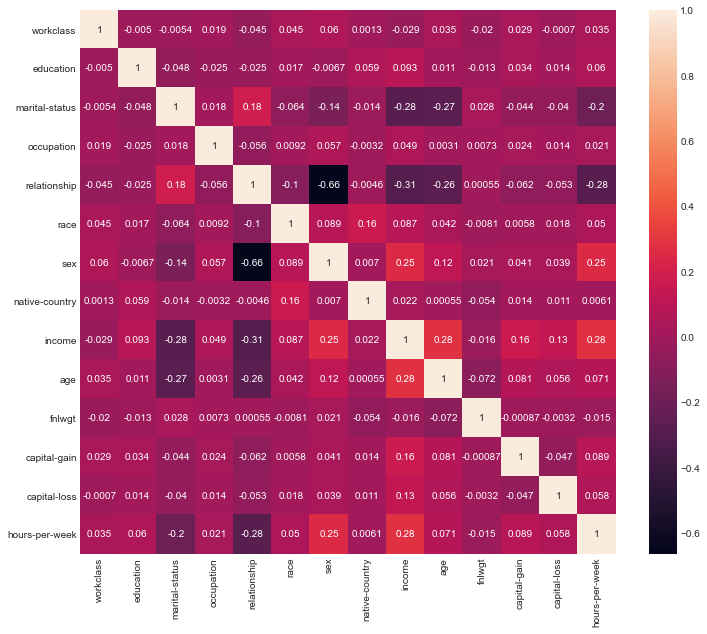

In [123]:
plt.figure(figsize = (12, 10))

sns.heatmap(corr_df.corr(), annot = True)
plt.show()

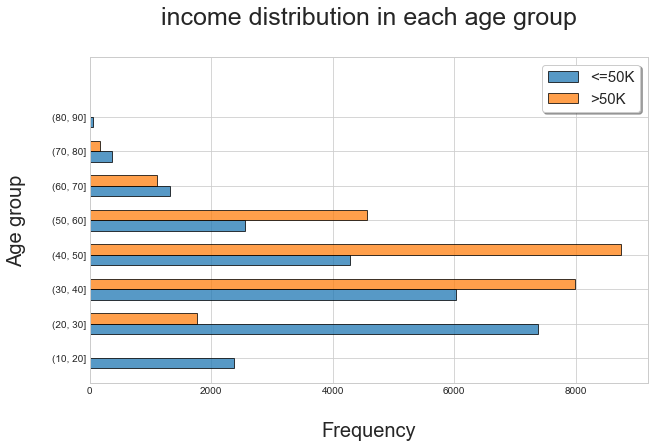

In [177]:

age_dis = pd.cut(df['age'], [10, 20, 30,40,50,60,70,80,90, 100])
temp_df = df.copy()
temp_df['age_dis'] = age_dis

viz_age_dis_sal = temp_df.groupby(['age_dis', 'income'])[['income']].count().unstack()['income']

age_d = np.arange(len(viz_age_dis_sal.index))
width = 0.3

plt.figure(figsize = (10, 6))

plt.barh(age_d - width/2, viz_age_dis_sal.loc[:, '<=50K'], height = width, label = '<=50K', alpha = 0.75, edgecolor = 'black')
plt.barh(age_d + width/2, viz_age_dis_sal.loc[:, '>50K'], height = width, label = '>50K', alpha = 0.75, edgecolor = 'black')

plt.title('income distribution in each age group\n', fontsize = 25)
plt.xlabel('\nFrequency', fontsize = 20)
plt.ylabel('Age group\n', fontsize = 20)

plt.legend(frameon = True, fontsize = 15, shadow = True)
plt.yticks(np.arange(0,8), age_dis.unique().sort_values())

plt.show()

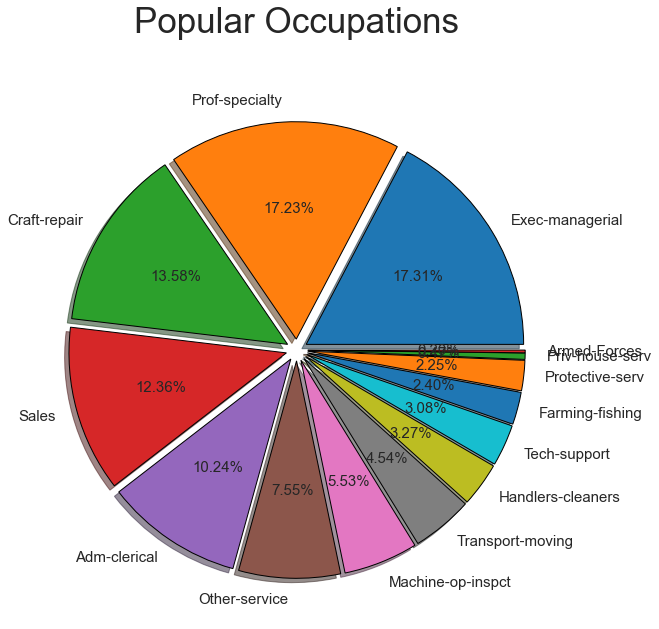

In [180]:
occ_gr = df['occupation'].value_counts()

plt.figure(figsize = (10, 10))

plt.pie(occ_gr.values, labels = occ_gr.index, 
        wedgeprops = {'edgecolor': 'black'}, 
        textprops = {'fontsize': 15},
        autopct = '%1.2f%%', 
        shadow = True, 
        explode = np.full(len(occ_gr), 0.05))

plt.title('Popular Occupations\n', fontsize = 35)
plt.show()

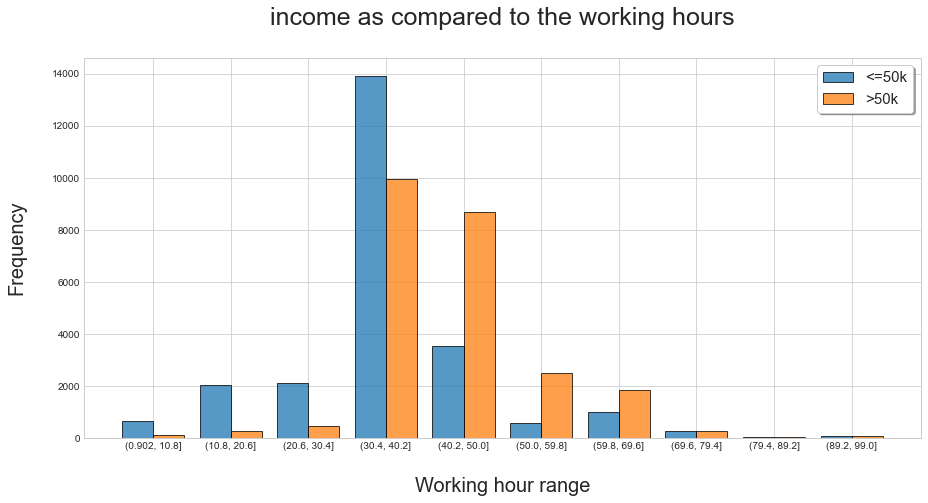

In [181]:
wk_hr_dis = pd.cut(df['hours-per-week'], 10)

temp_wk = df.copy()
temp_wk['work_hr_dis'] = wk_hr_dis

viz_wk_hr_sal = temp_wk.groupby(['work_hr_dis', 'income'])[['income']].count().unstack()['income']

plt.figure(figsize = (15, 7))
hr_d = np.arange(len(wk_hr_dis.unique()))
width = 0.4

plt.bar(hr_d - width / 2, viz_wk_hr_sal['<=50K'], width = width, alpha = 0.75, edgecolor = 'black', label = '<=50k')
plt.bar(hr_d + width / 2, viz_wk_hr_sal['>50K'], width = width, alpha = 0.75, edgecolor = 'black', label = '>50k')

plt.title('income as compared to the working hours\n', fontsize = 25)
plt.xlabel('\nWorking hour range', fontsize = 20)
plt.ylabel('Frequency\n', fontsize = 20)

plt.xticks(hr_d, wk_hr_dis.unique().sort_values())
plt.legend(frameon = True, shadow = True, fontsize = 15, loc = 'best')
plt.show()

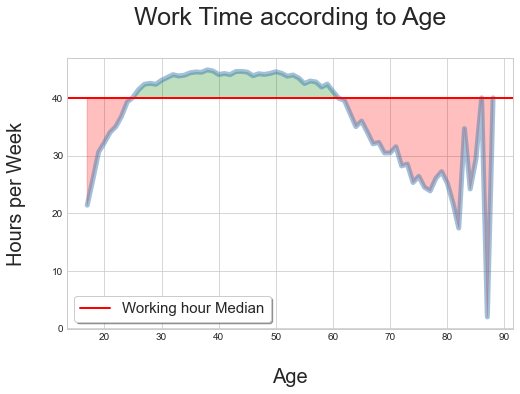

In [182]:
age_wk_hr = df.groupby('age')[['hours-per-week']].aggregate(np.mean)
wk_hr_median = df['hours-per-week'].median()

plt.figure(figsize = (8, 5))

plt.plot(age_wk_hr.index, age_wk_hr.iloc[:, 0], linewidth = 5, color = 'steelblue', alpha = 0.5)

plt.fill_between(age_wk_hr.index, age_wk_hr.iloc[:, 0], wk_hr_median, 
                 where = (age_wk_hr.iloc[:, 0] > wk_hr_median),
                 interpolate= True, alpha = 0.25, color = 'green')
plt.fill_between(age_wk_hr.index, age_wk_hr.iloc[:, 0], wk_hr_median, 
                 where = (age_wk_hr.iloc[:, 0] < wk_hr_median),
                 interpolate= True, alpha = 0.25, color = 'red')


plt.axhline(wk_hr_median, color = 'red', linewidth = 2, 
            label = 'Working hour Median')

plt.title('Work Time according to Age\n', fontsize = 25)
plt.xlabel('\nAge', fontsize = 20)
plt.ylabel('Hours per Week\n', fontsize = 20)

plt.legend(loc = 'best', frameon = True, shadow = True, fontsize = 15)
plt.show()

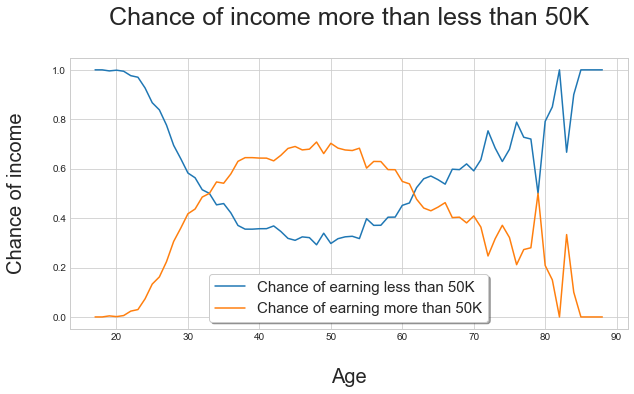

In [183]:
df_temp = df.copy()

df_temp['income_>50K'] = df_temp['income'].map({'<=50K': 0, '>50K': 1})
df_temp['income_<=50K'] = df_temp['income'].map({'<=50K': 1, '>50K': 0})

age_sal = df_temp.groupby('age')[['income_<=50K', 'income_>50K']].mean()

plt.figure(figsize = (10, 5))

plt.plot(age_sal.index, age_sal['income_<=50K'], label = 'Chance of earning less than 50K')
plt.plot(age_sal.index, age_sal['income_>50K'], label = 'Chance of earning more than 50K')

plt.title('Chance of income more than less than 50K\n', fontsize = 25)
plt.xlabel('\nAge', fontsize = 20)
plt.ylabel('Chance of income\n', fontsize = 20)

plt.legend(loc = 'best', frameon = True, shadow = True, fontsize = 15)
plt.show()

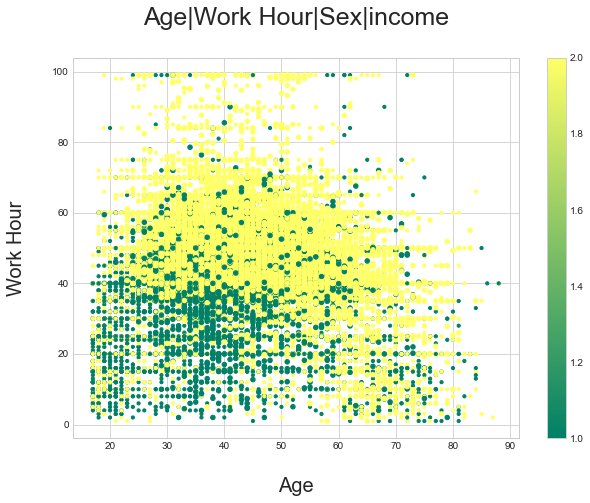

In [184]:
df_temp = df.copy()

df_temp['income'] = df_temp['income'].map({'<=50K': 0, '>50K': 1})

age_wkhr_sal = df_temp.groupby(['age', 'hours-per-week'])[['income']].aggregate(np.mean).unstack().fillna(0)['income']

plt.figure(figsize = (10, 7))

plt.scatter(df_temp['age'], df_temp['hours-per-week'], c = df_temp['sex'].map({'Female': 1, 'Male': 2}),
            s = df_temp['income'].map({0:1, 1: 2}) * 10, cmap = 'summer')

plt.title('Age|Work Hour|Sex|income\n', fontsize = 25)
plt.xlabel('\nAge', fontsize = 20)
plt.ylabel('Work Hour\n', fontsize = 20)
    
plt.colorbar()
plt.show()

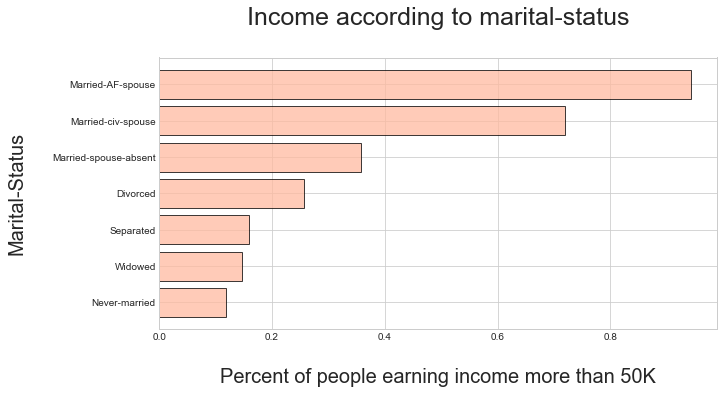

In [185]:
df_temp = df.copy()

df_temp['income'] = df_temp['income'].map({'<=50K': 0, '>50K': 1})

ms_sal = df_temp.groupby('marital-status')[['income']].aggregate(np.mean).sort_values(by = 'income', ascending = True)

plt.figure(figsize = (10, 5))

plt.barh(ms_sal.index, ms_sal.iloc[:, 0], color = '#FFBAA0', edgecolor = 'black', alpha = 0.75)

plt.title('Income according to marital-status\n', fontsize = 25)
plt.xlabel('\nPercent of people earning income more than 50K', fontsize = 20)
plt.ylabel('Marital-Status\n', fontsize = 20)

plt.show()

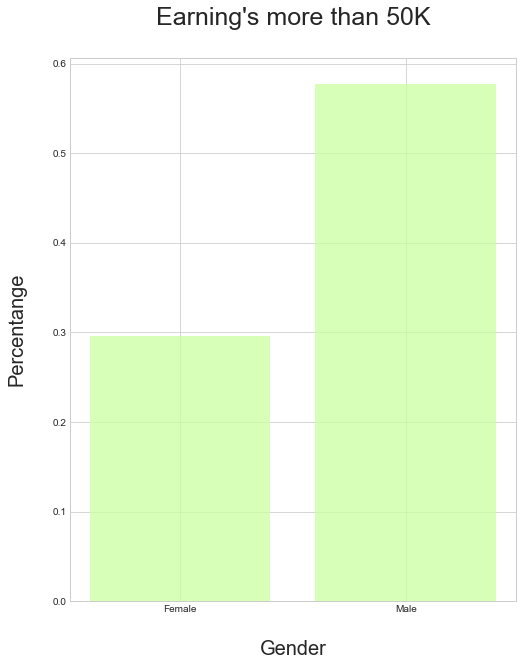

In [186]:
df_temp = df.copy()

df_temp['income'] = df_temp['income'].map({'<=50K': 0, '>50K': 1})

gen_sal = df_temp.groupby('sex')[['income']].mean()

plt.figure(figsize = (8, 10))

plt.bar(gen_sal.index, gen_sal['income'], color = '#CCFFA0', alpha = 0.75)

plt.title('Earning\'s more than 50K\n', fontsize = 25)
plt.xlabel('\nGender', fontsize = 20)
plt.ylabel('Percentange\n', fontsize = 20)

plt.show()

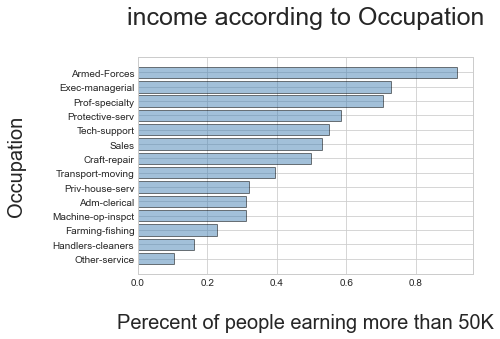

In [187]:
df_temp = df.copy()

df_temp['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

occ_sal = df_temp.groupby('occupation')[['income']].mean().sort_values(by = 'income', ascending = True)

plt.barh(occ_sal.index, occ_sal['income'], alpha = 0.5, color = 'steelblue', edgecolor = 'black')

plt.title('income according to Occupation\n', fontsize = 25)
plt.xlabel('\nPerecent of people earning more than 50K', fontsize = 20)
plt.ylabel('Occupation\n', fontsize = 20)

plt.show()

In [219]:
class Tuning_types():
    grid = GridSearchCV
    random = RandomizedSearchCV
    
class Classifiers():
    # I've manually set some parameters of log because of some errors in my system
    # (you can try doing it without setting it manually)
    log = LogisticRegression(solver = 'liblinear', max_iter = 1000) 
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    svc = SVC()
    gnb = GaussianNB()
  
    

class Model(object):
    
    target_col = df.columns[-1]
    test_size = 0.25
    
    def __init__(self, df):
        
        self.df = df
        self.X = df.drop(Model.target_col, axis = 1).copy()
        self.y = df[Model.target_col].copy()
        
        
    def desc_cols(self):    
        oe = []
        ohe = []

        
        
        for i in self.df.columns[:-1]:
            if self.df[i].dtype == object:
                if self.df[i].nunique() <= 7:
                    oe.append(i)

                else:
                    ohe.append(i)
                    
        return oe, ohe
 

    @property
    def train_test_set(self):
  
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, stratify = self.y, 
                                                            test_size = Model.test_size, random_state = 0)
        
        return X_train, X_test, y_train, y_test
    
    def transform_columns(self, ss = None, oe = [], ohe = []):
        
        def ss_choice():
            if ss == None:
                return make_column_selector(dtype_include = ['int', 'float'])
            else:
                return ss
            

            
        temp = ''
        
        if ((oe == []) & (ohe == [])):
            oe, ohe = self.desc_cols()
            
        elif (ohe == []) & (oe != []):
            temp, ohe = self.desc_cols()
            
        elif (oe == []) & (ohe != []):
            oe, temp = self.desc_cols()
        
        trans_col = make_column_transformer((StandardScaler(), ss_choice()), 
                                           (OneHotEncoder(handle_unknown = 'ignore', sparse = False), ohe), 
                                           (OrdinalEncoder(), oe), 
                                           remainder  = 'passthrough')
        
        return trans_col
    
    
    
    @property
    def target_col_trans_col(self):
        
        return make_column_transformer((LabelEncoder(), Model.target_col), 
                                       remainder = 'passthrough')

    
class Logistic_Regression(Model):
    def __init__(self, df = df):
        super().__init__(df)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        self.clf_log = Classifiers().log
        self.tune = Tuning_types()
        
    def pipe_log(self, ss = None, oe = [], ohe = []):
        pipe = make_pipeline(self.transform_columns(ss = None, oe = oe, ohe = ohe), self.clf_log)
        
        return pipe
    
    
    def tune_params_log(self,
                    tuning = 'grid',
                    penalty = ['l1', 'l2'],
                    dual = [False],
                    tol = [0.0001, 0.001, 0.01, 0.1], 
                    C = [1, 2, 4, 5],
                    fit_intercept = [True],
                    intercept_scaling = [1],
                    class_weight = [None],
                    random_state = [None],
                    multi_class = ['auto'],
                    verbose = [0],
                    warm_start = [False],
                    n_jobs = [None],
                    l1_ratio = [None],
                                   ):
        
        
        params = {
            'logisticregression__penalty': penalty,
            'logisticregression__dual': dual,
            'logisticregression__tol': tol,
            'logisticregression__C': C,
            'logisticregression__fit_intercept': fit_intercept,
            'logisticregression__intercept_scaling': intercept_scaling,
            'logisticregression__class_weight': class_weight,
            'logisticregression__random_state': random_state,
            'logisticregression__multi_class': multi_class,
            'logisticregression__verbose': verbose,
            'logisticregression__warm_start': warm_start,
            'logisticregression__n_jobs': n_jobs,
            'logisticregression__l1_ratio': l1_ratio,
        }
        
        if tuning == 'grid':
            return self.tune.grid(self.pipe_log(), params, cv = 5, verbose = 10)
        
        elif tuning == 'random':
            return self.tune.random(self.pipe_log(), params, cv = 5, verbose = 10)
        
        else:
            return "ERROR: Invalid tuning type.\nSet tuning as in ['grid', 'random'] in the parameter."

        
class Decision_Tree(Model):
    def __init__(self, df = df):
        super().__init__(df)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        self.clf_dt = Classifiers().dt
        self.tune = Tuning_types()
    
    
    def pipe_dt(self, ss = None, oe = [], ohe = []):
        pipe = make_pipeline(self.transform_columns(ss = None, oe = oe, ohe = ohe), self.clf_dt)
        
        return pipe
    
    def tune_params_dt(self, 
                    tuning = 'grid', 
                    criterion = ['entropy', 'gini'],
                    splitter = ['best'],
                    max_depth = [None],
                    min_samples_split = np.arange(2, 11, 2),
                    min_samples_leaf = np.arange(1,6),
                    min_weight_fraction_leaf = [0.0],
                    max_features = [None],
                    random_state = [None],
                    max_leaf_nodes = [None],
                    min_impurity_decrease = [0.0],
                    min_impurity_split = [None],
                    class_weight = [None],
                    ccp_alpha = [0.0], ):
        
        params = {
            'decisiontreeclassifier__criterion': criterion,
            'decisiontreeclassifier__splitter': splitter,
            'decisiontreeclassifier__max_depth': max_depth,
            'decisiontreeclassifier__min_samples_split': min_samples_split,
            'decisiontreeclassifier__min_samples_leaf': min_samples_leaf,
            'decisiontreeclassifier__min_weight_fraction_leaf': min_weight_fraction_leaf,
            'decisiontreeclassifier__max_features': max_features,
            'decisiontreeclassifier__random_state': random_state,
            'decisiontreeclassifier__max_leaf_nodes': max_leaf_nodes,
            'decisiontreeclassifier__min_impurity_decrease': min_impurity_decrease,
            'decisiontreeclassifier__min_impurity_split': min_impurity_split,
            'decisiontreeclassifier__class_weight': class_weight,
            'decisiontreeclassifier__ccp_alpha': ccp_alpha,
        }
        
        
        if tuning == 'grid':
            return self.tune.grid(self.pipe_dt(), params, cv = 5, verbose = 10)
        
        elif tuning == 'random':
            return self.tune.random(self.pipe_dt(), params, cv = 5, verbose = 10)
        
        else:
            return "ERROR: Invalid tuning type.\nSet tuning as in ['grid', 'random'] in the parameter."

        

class Random_Forest(Model):
            

    def __init__(self, df = df):
        super().__init__(df)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        self.clf_rf = Classifiers().rf
        self.tune = Tuning_types()
    
    
    def pipe_rf(self, ss = None, oe = [], ohe = []):
        pipe = make_pipeline(self.transform_columns(ss = None, oe = oe, ohe = ohe), self.clf_rf)
        
        return pipe
    
    
    def tune_params_rf(self, 
                    tuning = 'grid', 
                    n_estimators = [50, 100, 150],
                    criterion = ['entropy', 'gini'],
                    max_depth = [None],
                    min_samples_split = np.arange(2, 11, 2),
                    min_samples_leaf = [1],
                    min_weight_fraction_leaf = [0.0],
                    max_features = ['auto'],
                    max_leaf_nodes = [None],
                    min_impurity_decrease = [0.0],
                    min_impurity_split = [None],
                    bootstrap = [True],
                    oob_score = [False],
                    n_jobs = [None],
                    random_state = [None],
                    verbose = [0],
                    warm_start = [False],
                    class_weight = [None],
                    ccp_alpha = [0.0],
                    max_samples = [None]
                   ):
        
        RandomForestClassifier()
        params = {
            'randomforestclassifier__n_estimators': n_estimators,
            'randomforestclassifier__criterion': criterion,
            'randomforestclassifier__max_depth': max_depth,
            'randomforestclassifier__min_samples_split': min_samples_split,
            'randomforestclassifier__min_samples_leaf': min_samples_leaf,
            'randomforestclassifier__min_weight_fraction_leaf': min_weight_fraction_leaf,
            'randomforestclassifier__max_features': max_features,
            'randomforestclassifier__max_leaf_nodes': max_leaf_nodes,
            'randomforestclassifier__min_impurity_decrease': min_impurity_decrease,
            'randomforestclassifier__min_impurity_split': min_impurity_split,
            'randomforestclassifier__bootstrap': bootstrap,
            'randomforestclassifier__oob_score': oob_score,
            'randomforestclassifier__n_jobs': n_jobs,
            'randomforestclassifier__random_state': random_state,
            'randomforestclassifier__verbose': verbose,
            'randomforestclassifier__warm_start': warm_start,
            'randomforestclassifier__class_weight': class_weight,
            'randomforestclassifier__ccp_alpha': ccp_alpha,
            'randomforestclassifier__max_samples': max_samples
        }
        
        
        if tuning == 'grid':
            return self.tune.grid(self.pipe_rf(), params, cv = 5, verbose = 10)
        
        elif tuning == 'random':
            return self.tune.random(self.pipe_rf(), params, cv = 5, verbose = 10)
        
        else:
            return "ERROR: Invalid tuning type.\nSet tuning as in ['grid', 'random'] in the parameter."
        
    
class Support_Vector_Machine(Model):
    
        
    def __init__(self, df = df):
        super().__init__(df)

        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        self.clf_svc = Classifiers().svc
        self.tune = Tuning_types()
    
    
    def pipe_svc(self, ss = None, oe = [], ohe = []):
        pipe = make_pipeline(self.transform_columns(ss = None, oe = oe, ohe = ohe), self.clf_svc)
        
        return pipe
        
    def tune_params_svc(self, 
                    tuning = 'grid', 
                    C = [1.0],
                    kernel = ['linear', 'rbf', 'poly'],
                    degree = [3],
                    gamma = ['scale'],
                    coef0 = [0.0],
                    shrinking = [True],
                    probability = [False],
                    tol = [1e-3],
                    cache_size = [200],
                    class_weight = [None],
                    verbose = [False],
                    max_iter = [-1],
                    decision_function_shape = ['ovr'],
                    break_ties = [False],
                    random_state = [None]
                   ):
        params = {
            'svc__C': C,
            'svc__kernel': kernel,
            'svc__degree': degree,
            'svc__gamma': gamma,
            'svc__coef0': coef0,
            'svc__shrinking': shrinking,
            'svc__probability': probability,
            'svc__tol': tol,
            'svc__cache_size': cache_size,
            'svc__class_weight': class_weight,
            'svc__verbose': verbose,
            'svc__max_iter': max_iter,
            'svc__decision_function_shape': decision_function_shape,
            'svc__break_ties': break_ties,
            'svc__random_state': random_state
        }

        
        if tuning == 'grid':
            return self.tune.grid(self.pipe_svc(), params, cv = 5, verbose = 10)
        
        elif tuning == 'random':
            return self.tune.random(self.pipe_svc(), params, cv = 5, verbose = 10)
        
        else:
            return "ERROR: Invalid tuning type.\nSet tuning as in ['grid', 'random'] in the parameter."

        

class Gaussian_Naive_Bayes(Model):
    
    def __init__(self, df = df):
        super().__init__(df)

        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        self.clf_gnb = Classifiers().gnb
        self.tune = Tuning_types()
    
    
    def pipe_gnb(self, ss = None, oe = [], ohe = []):
        pipe = make_pipeline(self.transform_columns(ss = None, oe = oe, ohe = ohe), self.clf_gnb)
        
        return pipe

    def tune_params_gnb(self, 
                    tuning = 'grid', 
                    var_smoothing = [1e-10, 1e-09, 1e-8],
                    priors = [None],
                    ):
        
        params = {
            'gaussiannb__var_smoothing': var_smoothing,
            'gaussiannb__priors': priors
        }
    
    
        if tuning == 'grid':
            return self.tune.grid(self.pipe_gnb(), params, cv = 5, verbose = 10)
        
        elif tuning == 'random':
            return self.tune.random(self.pipe_gnb(), params, cv = 5, verbose = 10)

        
        else:
            return "ERROR: Invalid tuning type.\nSet tuning as in ['grid', 'random'] in the parameter."
        
    
    
    
    

class Evaluate(Logistic_Regression, 
               Decision_Tree, 
               Random_Forest, 
               Support_Vector_Machine, 
               Gaussian_Naive_Bayes):

    def __init__(self, df):
        super().__init__(df)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_set
        
    def show(self, y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test):

        accuracy_tr_nm = accuracy_score(self.y_train, y_pred_nm_train)
        accuracy_ts_nm = accuracy_score(self.y_test, y_pred_nm_test)
        
        accuracy_tr_tm = accuracy_score(self.y_train, y_pred_tm_train)
        accuracy_ts_tm = accuracy_score(self.y_test, y_pred_tm_test)
        
        acc = pd.DataFrame({'Training Set': [accuracy_tr_nm, accuracy_tr_tm], 
                      'Testing Set': [accuracy_ts_nm, accuracy_ts_tm]},
                     index = ['Before parameter optimization', 
                              'After parameter optimization'])

        
        print('/' * 100, '\n')
        print('Acccuracy Score:- ')
        print('*' * 50)
        print(acc)
        print('*' * 50, '\n')

        

        
        # Confusion Matrix
        confusion_matrix_tr_nm = confusion_matrix(self.y_train, y_pred_nm_train)
        confusion_matrix_ts_nm = confusion_matrix(self.y_test, y_pred_nm_test)
        
        confusion_matrix_tr_tm = confusion_matrix(self.y_train, y_pred_tm_train)
        confusion_matrix_ts_tm = confusion_matrix(self.y_test, y_pred_tm_test)
        print('Confusion Matrix:- ')
        print('*' * 50)
        print('Confusion Matrix (Training Set):- ')
        print('Before parameter tuning:- \n', confusion_matrix_tr_nm)
        print('After parameter tuning:- \n', confusion_matrix_tr_tm)
        print('\n')
        print('Confusion Matrix (Testing Set):- ')
        print('Before parameter tuning:- \n', confusion_matrix_ts_nm)
        print('After parameter tuning:- \n', confusion_matrix_ts_tm)
        print('*' * 50, '\n')
        
        # Classification Report
        classification_report_tr_nm = classification_report(self.y_train, y_pred_nm_train)
        classification_report_ts_nm = classification_report(self.y_test, y_pred_nm_test)
        
        classification_report_tr_tm = classification_report(self.y_train, y_pred_tm_train)
        classification_report_ts_tm = classification_report(self.y_test, y_pred_tm_test)
        
        print('Classification Report:- ')
        print('*' * 50)
        print('Classification Report (Training Set):- ')
        print('Before parameter tuning:- \n', classification_report_tr_nm)
        print('After parameter tuning:- \n', classification_report_tr_tm)
        
        print('\n')
        print('Classification Report (Testing Set):- ')
        print('Before parameter tuning:- \n', classification_report_ts_nm)
        print('After parameter tuning:- \n', classification_report_ts_tm)
        print('*' * 50, '\n')
        
        print('/' * 100)
        
        
    @property
    def evaluate_log(self):
        
        normal_model = self.pipe_log().fit(self.X_train, self.y_train)
        tuned_model = self.tune_params_log().fit(self.X_train, self.y_train)
        
        y_pred_nm_train = normal_model.predict(self.X_train)
        y_pred_nm_test = normal_model.predict(self.X_test)
        
        y_pred_tm_train = tuned_model.predict(self.X_train)
        y_pred_tm_test = tuned_model.predict(self.X_test)

        self.show(y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test)
        
        
        
        
    @property
    def evaluate_dt(self):
        
        normal_model = self.pipe_dt().fit(self.X_train, self.y_train)
        tuned_model = self.tune_params_dt().fit(self.X_train, self.y_train)
        
        y_pred_nm_train = normal_model.predict(self.X_train)
        y_pred_nm_test = normal_model.predict(self.X_test)
        
        y_pred_tm_train = tuned_model.predict(self.X_train)
        y_pred_tm_test = tuned_model.predict(self.X_test)

        self.show(y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test)
        

        
    @property
    def evaluate_rf(self):
        
        normal_model = self.pipe_rf().fit(self.X_train, self.y_train)
        tuned_model = self.tune_params_rf().fit(self.X_train, self.y_train)
        
        y_pred_nm_train = normal_model.predict(self.X_train)
        y_pred_nm_test = normal_model.predict(self.X_test)
        
        y_pred_tm_train = tuned_model.predict(self.X_train)
        y_pred_tm_test = tuned_model.predict(self.X_test)

        self.show(y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test)
        
    @property
    def evaluate_svc(self):
        
        normal_model = self.pipe_svc().fit(self.X_train, self.y_train)
        tuned_model = self.tune_params_svc().fit(self.X_train, self.y_train)
        
        y_pred_nm_train = normal_model.predict(self.X_train)
        y_pred_nm_test = normal_model.predict(self.X_test)
        
        y_pred_tm_train = tuned_model.predict(self.X_train)
        y_pred_tm_test = tuned_model.predict(self.X_test)
        
        self.show(y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test)
        

    @property
    def evaluate_gnb(self):
        
        normal_model = self.pipe_gnb().fit(self.X_train, self.y_train)
        tuned_model = self.tune_params_gnb().fit(self.X_train, self.y_train)
        
        y_pred_nm_train = normal_model.predict(self.X_train)
        y_pred_nm_test = normal_model.predict(self.X_test)
        
        y_pred_tm_train = tuned_model.predict(self.X_train)
        y_pred_tm_test = tuned_model.predict(self.X_test)
        
        self.show(y_pred_nm_train, y_pred_nm_test, y_pred_tm_train, y_pred_tm_test)
        
        
    # This method will evaluate all the model
    def evaluate_all(self, *models):
        
        for i in models:
            if i == 'logisticregression':
                self.evaluate_log
                
            elif i == 'decisiontreeclassifier':
                self.evaluate_dt
                
            elif i == 'randomforestclassifier':
                self.evaluate_rf
                
            elif i == 'supportvectorclassifier':
                self.evaluate_svc
                
            elif i == 'gaussiannaivebayes':
                self.evaluate_gnb

In [220]:
ev = Evaluate(df)

In [221]:
#1.logisticregression
ev.evaluate_log

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__dual=False, logisticregression__fit_intercept=True, logisticregression__intercept_scaling=1, logisticregression__l1_ratio=None, logisticregression__multi_class=auto, logisticregression__n_jobs=None, logisticregression__penalty=l1, logisticregression__random_state=None, logisticregression__tol=0.0001, logisticregression__verbose=0, logisticregression__warm_start=False
[CV 1/5; 1/32] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__dual=False, logisticregression__fit_intercept=True, logisticregression__intercept_scaling=1, logisticregression__l1_ratio=None, logisticregression__multi_class=auto, logisticregression__n_jobs=None, logisticregression__penalty=l1, logisticregression__random_state=None, logisticregression__tol=0.0001, logisticregression__verbose=0, logisticregression__warm_st

In [222]:
#2. decisiontree
ev.evaluate_dt

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START decisiontreeclassifier__ccp_alpha=0.0, decisiontreeclassifier__class_weight=None, decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__max_features=None, decisiontreeclassifier__max_leaf_nodes=None, decisiontreeclassifier__min_impurity_decrease=0.0, decisiontreeclassifier__min_impurity_split=None, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2, decisiontreeclassifier__min_weight_fraction_leaf=0.0, decisiontreeclassifier__random_state=None, decisiontreeclassifier__splitter=best
[CV 1/5; 1/50] END decisiontreeclassifier__ccp_alpha=0.0, decisiontreeclassifier__class_weight=None, decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__max_features=None, decisiontreeclassifier__max_leaf_nodes=None, decisiontreeclassifier__min_impurity_decrease=0.0, decisiontreeclass

In [223]:
#3.Randomforest
ev.evaluate_rf

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START randomforestclassifier__bootstrap=True, randomforestclassifier__ccp_alpha=0.0, randomforestclassifier__class_weight=None, randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__max_leaf_nodes=None, randomforestclassifier__max_samples=None, randomforestclassifier__min_impurity_decrease=0.0, randomforestclassifier__min_impurity_split=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_weight_fraction_leaf=0.0, randomforestclassifier__n_estimators=50, randomforestclassifier__n_jobs=None, randomforestclassifier__oob_score=False, randomforestclassifier__random_state=None, randomforestclassifier__verbose=0, randomforestclassifier__warm_start=False
[CV 1/5; 1/30] END randomforestclassifier__bootstrap=True, randomforestclassifier__ccp_alpha=0.0, ran

In [224]:
#4.supportvector
ev.evaluate_svc

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START svc__C=1.0, svc__break_ties=False, svc__cache_size=200, svc__class_weight=None, svc__coef0=0.0, svc__decision_function_shape=ovr, svc__degree=3, svc__gamma=scale, svc__kernel=linear, svc__max_iter=-1, svc__probability=False, svc__random_state=None, svc__shrinking=True, svc__tol=0.001, svc__verbose=False
[CV 1/5; 1/3] END svc__C=1.0, svc__break_ties=False, svc__cache_size=200, svc__class_weight=None, svc__coef0=0.0, svc__decision_function_shape=ovr, svc__degree=3, svc__gamma=scale, svc__kernel=linear, svc__max_iter=-1, svc__probability=False, svc__random_state=None, svc__shrinking=True, svc__tol=0.001, svc__verbose=False; total time= 1.6min
[CV 2/5; 1/3] START svc__C=1.0, svc__break_ties=False, svc__cache_size=200, svc__class_weight=None, svc__coef0=0.0, svc__decision_function_shape=ovr, svc__degree=3, svc__gamma=scale, svc__kernel=linear, svc__max_iter=-1, svc__probability=False, svc__random_state=None, svc

In [225]:
#5.gaussiannaivebayes
ev.evaluate_gnb

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10....
[CV 1/5; 1/3] END gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10; total time=   0.1s
[CV 2/5; 1/3] START gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10....
[CV 2/5; 1/3] END gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10; total time=   0.1s
[CV 3/5; 1/3] START gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10....
[CV 3/5; 1/3] END gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10; total time=   0.1s
[CV 4/5; 1/3] START gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10....
[CV 4/5; 1/3] END gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10; total time=   0.1s
[CV 5/5; 1/3] START gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10....
[CV 5/5; 1/3] END gaussiannb__priors=None, gaussiannb__var_smoothing=1e-10; total time=   0.1s
[CV 1/5; 2/3] START gaussiannb__priors=None, gaussiannb__var